<a href="https://colab.research.google.com/github/sumansemalty/Timeline-Analysis-Covid-19/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Suman Semalty**

**Task 8:-Timeline Analysis : Covid-19**

● Create a storyboard showing spread of Covid-19 cases in your country or
any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

**Dataset:** Daily updated .csv file on https://bit.ly/30d2gdi

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [ ]:
#Reading the Data
covid_data = pd.read_csv('covid-data.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
covid_data.shape

(50174, 55)

In [ ]:
covid_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
50169,SOM,Africa,Somalia,2021-01-17,4744.0,0.0,2.571,130.0,0.0,0.0,298.492,0.0,0.162,8.18,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.30,15893219.0,23.500,16.8,2.731,1.496,NaN,NaN,365.769,6.05,NaN,NaN,9.831,0.90,57.40,NaN
50170,SOM,Africa,Somalia,2021-01-18,4744.0,0.0,2.571,130.0,0.0,0.0,298.492,0.0,0.162,8.18,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15893219.0,23.500,16.8,2.731,1.496,NaN,NaN,365.769,6.05,NaN,NaN,9.831,0.90,57.40,NaN
50171,SOM,Africa,Somalia,2021-01-19,4744.0,0.0,2.571,130.0,0.0,0.0,298.492,0.0,0.162,8.18,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15893219.0,23.500,16.8,2.731,1.496,NaN,NaN,365.769,6.05,NaN,NaN,9.831,0.90,57.40,NaN
50172,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699
50173,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,2.78,59308690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [ ]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.965700e+04,49655.000000,48870.000000,42787.000000,42786.000000,48870.000000,49309.000000,49307.000000,48527.000000,42452.000000,42451.000000,48527.000000,40054.000000,5542.000000,5542.000000,6579.000000,6579.000000,431.000000,431.000000,814.000000,814.000000,2.279500e+04,2.303900e+04,22795.000000,23039.000000,2.591700e+04,25917.000000,24469.000000,24112.000000,6.180000e+02,499.000000,840.000000,618.000000,840.000000,44911.000000,4.982600e+04,49825.000000,47524.000000,47524.000000,47195.000000,48229.000000,32447.000000,48153.000000,49513.000000,37947.000000,37312.000000,23916.000000,44106.000000,49513.000000,48549.000000
mean,1.244808e+05,1189.404189,1190.001081,4015.986959,32.483873,27.963663,5606.796587,61.721712,61.573662,136.645274,1.295192,1.109677,1.032320,429.680440,18.520713,2368.579419,127.329088,386.131770,30.341671,1637.809786,95.218677,2.573761e+06,2.506578e+04,128.025377,1.213086,2.487736e+04,1.180698,0.091310,141.089760,2.438760e+05,19887.104208,26786.110714,1.557346,932.363095,59.926480,4.491488e+07,362.449391,30.568422,8.855021,5.602939,19141.168324,13.134413,256.672947,7.762068,11.033679,32.354285,50.743166,3.052481,73.120597,0.715948
std,6.083613e+05,5117.656517,4945.061841,15431.153293,123.969353,105.016481,11214.642699,158.855319,138.686793,251.558117,4.102723,2.808488,0.353577,934.143442,24.608584,5888.213060,189.666383,1169.911348,96.134454,4883.921489,250.050789,1.150175e+07,9.955450e+04,250.011565,3.070012,9.234347e+04,2.182104,0.103826,592.722678,9.086482e+05,34449.921490,75723.177460,4.143158,2002.977242,22.268667,1.715329e+08,1719.823267,9.113574,6.324430,4.321558,19838.775431,20.212211,112.063820,3.968836,10.836802,13.331277,32.866747,2.470681,7.653208,0.153461
min,1.000000e+00,-46076.000000,-1121.714000,1.000000,-443.000000,-63.000000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-4.751000e+04,0.000000,-0.786000,0.000000e+00,0.000000,0.000000,1.600000,0.000000e+00,0.000000,51.000000,0.000000,1.000000,0.000000,3.393800e+04,1.980000,15.100000,1.307000,0.617000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.090000e+02,1.000000,4.571000,27.000000,0.000000,0.000000,139.940000,0.112000,1.072000,5.184000,0.000000,0.000000,0.870000,11.000000,2.283000,41.000000,10.739000,3.888000,1.223000,16.257250,5.164500,9.516700e+04,1.345000e+03,7.605500,0.111000,1.392000e+03,0.108000,0.016000,7.700000,1.112150e+04,1399.000000,1118.250000,0.140000,184.750000,45.370000,2.142252e+06,35.879000,22.600000,3.507000,2.063000,4881.406000,0.600000,168.711000,5.070000,1.900000,21.000000,17.450000,1.300000,67.920000,0.591000
50%,5.290000e+03,45.000000,53.571000,156.000000,1.000000,0.714000,918.193000,5.678000,7.492000,27.972000,0.086000,0.096000,1.050000,57.000000,7.078000,244.000000,43.002000,19.332000,3.730000,122.494000,18.330000,4.100750e+05,4.567000e+03,37.072000,0

In [ ]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   158
continent                                    6
location                                   159
date                                       386
total_cases                              25624
new_cases                                 5944
new_cases_smoothed                       12835
total_deaths                              8647
new_deaths                                 935
new_deaths_smoothed                       2689
total_cases_per_million                  37707
new_cases_per_million                    22337
new_cases_smoothed_per_million           25610
total_deaths_per_million                 22319
new_deaths_per_million                    4407
new_deaths_smoothed_per_million           5709
reproduction_rate                          324
icu_patients                              1300
icu_patients_per_million                  2752
hosp_patients                             2545
hosp_patients_per_million                 4559
weekly_icu_ad

In [ ]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                   348
continent                                  348
location                                     0
date                                         0
total_cases                                517
new_cases                                  519
new_cases_smoothed                        1304
total_deaths                              7387
new_deaths                                7388
new_deaths_smoothed                       1304
total_cases_per_million                    865
new_cases_per_million                      867
new_cases_smoothed_per_million            1647
total_deaths_per_million                  7722
new_deaths_per_million                    7723
new_deaths_smoothed_per_million           1647
reproduction_rate                        10120
icu_patients                             44632
icu_patients_per_million                 44632
hosp_patients                            43595
hosp_patients_per_million                43595
weekly_icu_ad

In [ ]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           13912
Europe           13283
Asia             11397
North America     6677
South America     2961
Oceania           1596
Name: continent, dtype: int64

**Analyzing cases worldwide**

In [ ]:

dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,1110.759,5.266,3.967,41.615,0.308,0.202,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
582,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,9670.582,207.450,179.899,216.485,3.822,3.177,1.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
912,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,1543.384,19.612,18.335,49.121,0.342,0.345,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1236,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,75998.188,1902.543,904.124,983.628,12.942,1.849,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772.0,9.992,0.090,11.1,people tested,NaN,NaN,NaN,NaN,NaN,59.26,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1542,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,409.265,2.343,4.425,9.797,0.000,0.065,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1855,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,1368.352,0.000,4.376,40.846,0.000,1.459,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97928.0,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2240,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,28995.873,124.901,215.915,784.056,2.854,5.930,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3206539.0,11203.0,70.948,0.248,23555.0,0.521,0.414,2.4,people tested,NaN,NaN,NaN,NaN,NaN,79.17,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
2566,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,39597.615,500.129,526.114,594.958,8.437,9.835,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
2926,AUS,Oceania,Australia,2020-11-15,27749.0,38.0,12.000,907.0,0.0,0.000,1088.201,1.490,0.471,35.569,0.000,0.000,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9379339.0,NaN,367.819,NaN,40218.0,1.577,0.000,3351.5,tests performed,NaN,NaN,NaN,NaN,NaN,52.31,25499881.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
3256,AUT,Europe,Austria,2020-11-15,203956.0,5665.0,7257.571,1829.0,83.0

In [ ]:
# looking at different locations
covid_data["location"].value_counts()

Argentina           386
Mexico              385
China               365
Japan               364
Singapore           363
                   ... 
Solomon Islands     100
Marshall Islands     84
Hong Kong            83
Samoa                63
South Africa          2
Name: location, Length: 159, dtype: int64

In [ ]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

**Data Visualization**

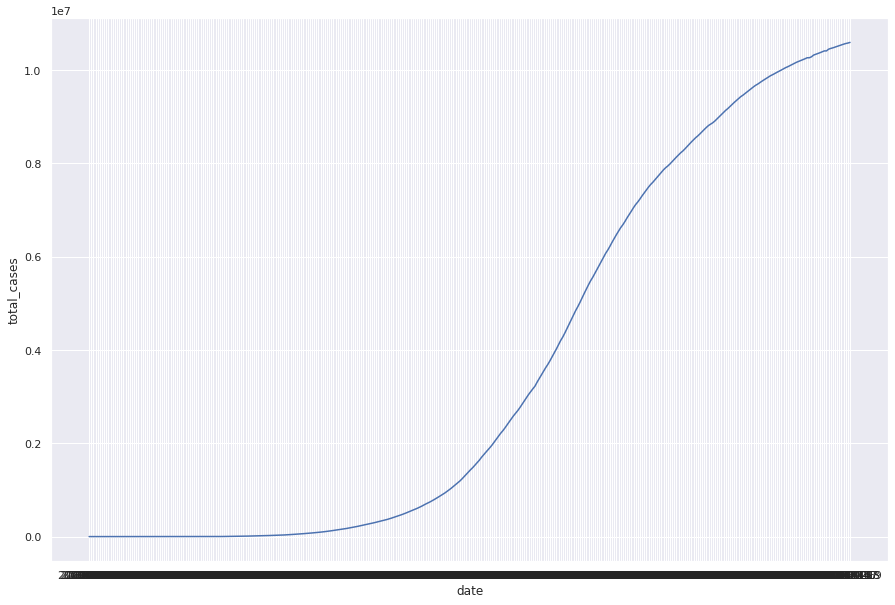

In [ ]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [ ]:
india_last_5_days=india.tail()

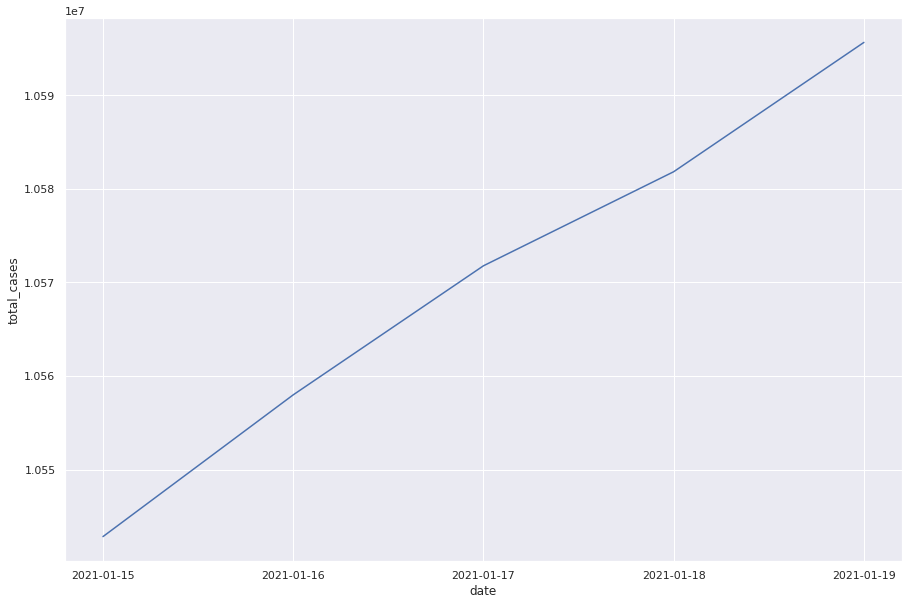

In [ ]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

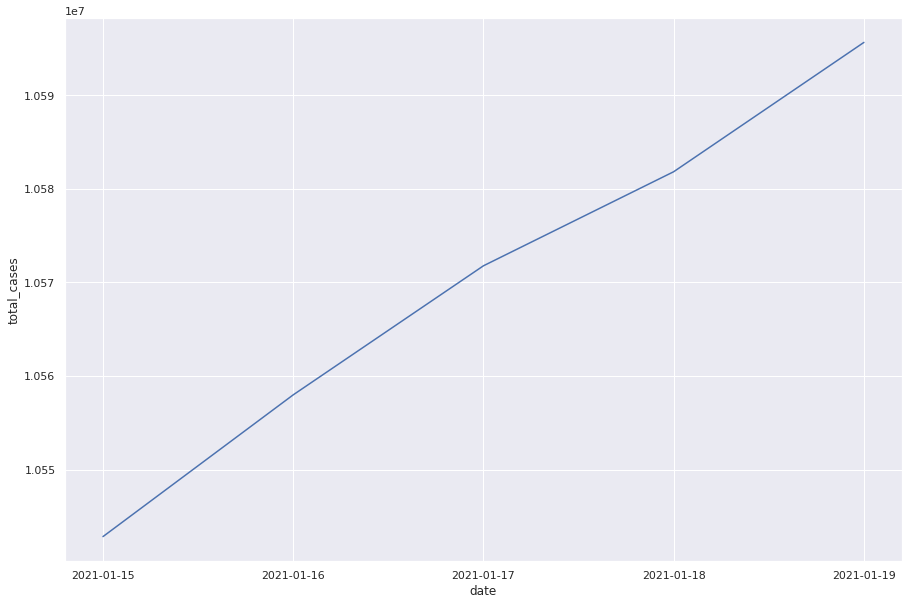

In [ ]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

**Covid cases in Brazil**

In [ ]:
# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]

In [ ]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7464,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7465,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7466,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7467,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7468,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [ ]:
brazil_last_5_days=brazil.tail()


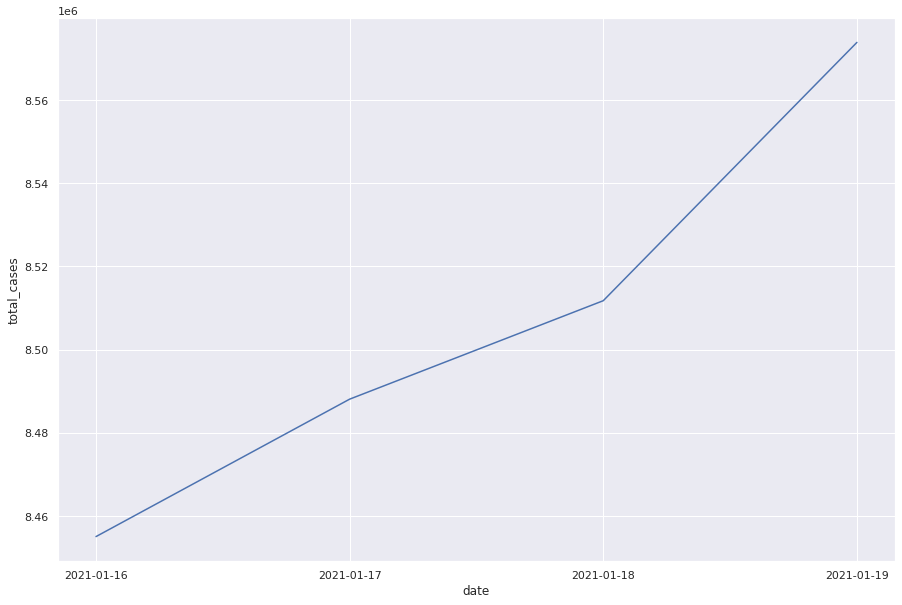

In [ ]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [ ]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

**Total Cases**

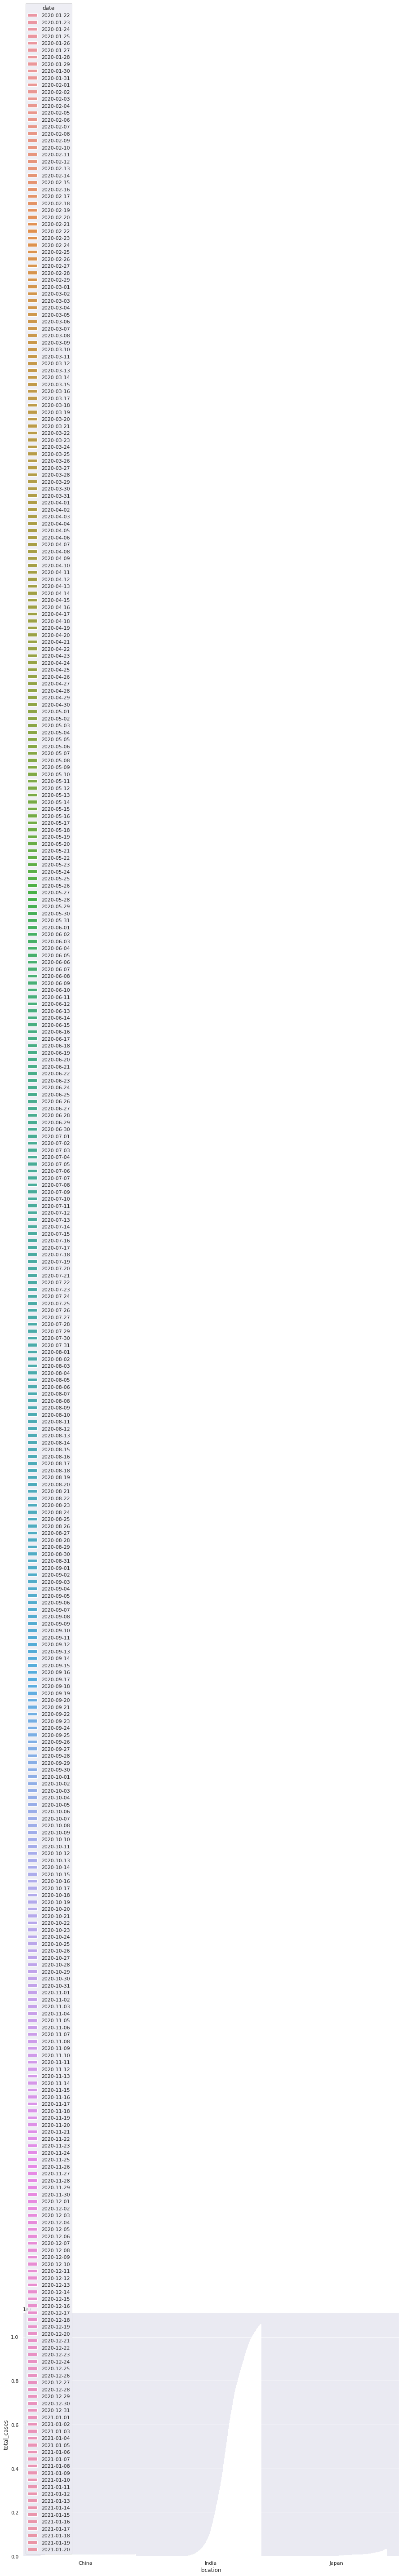

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [ ]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

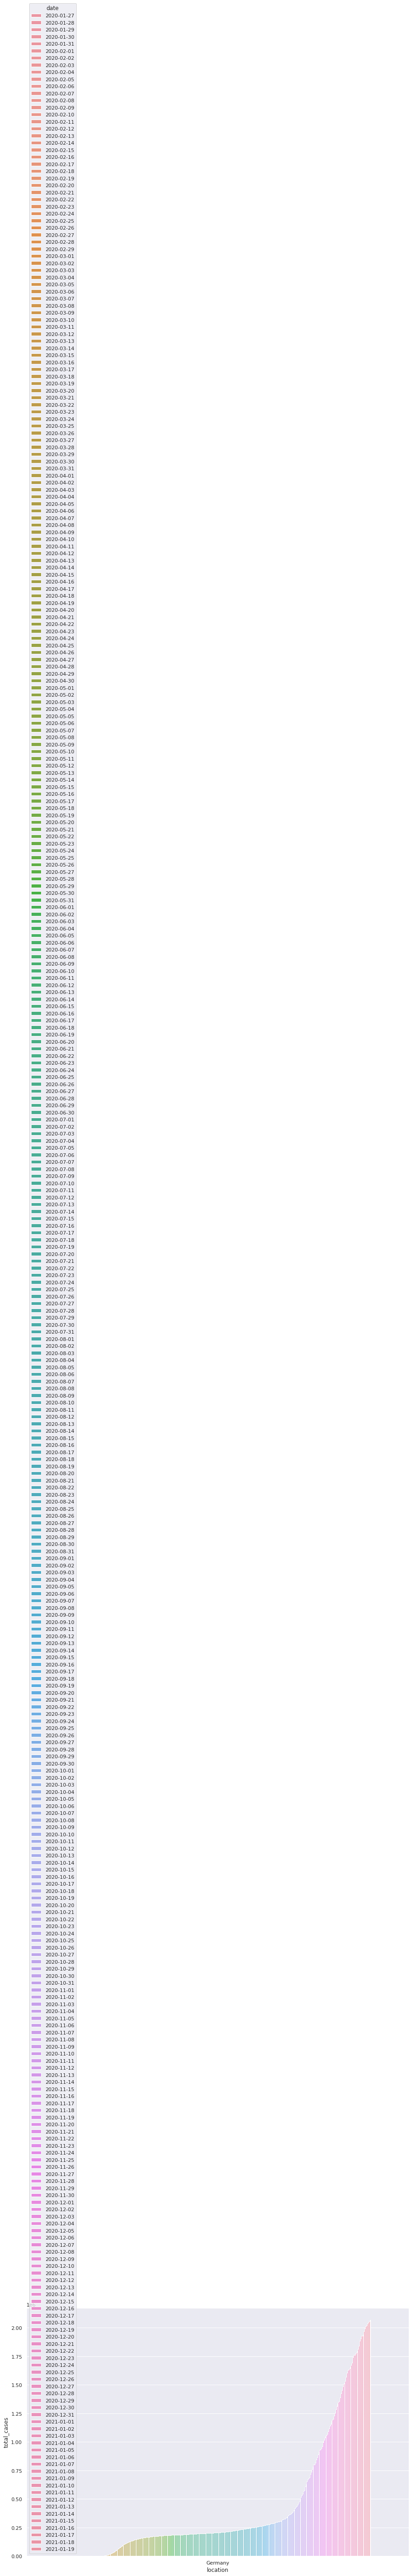

In [ ]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()


In [ ]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,1274.675,6.242,5.523,52.147,0.128,0.312,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
615,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,18070.748,201.543,255.205,370.422,3.822,4.418,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
945,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,2152.081,9.988,10.588,60.363,0.160,0.235,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1269,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,97314.437,685.951,523.246,1035.398,12.942,3.698,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1575,AGO,Africa,Angola,2020-12-18,16562.0,78.0,71.571,384.0,2.0,2.714,503.921,2.373,2.178,11.684,0.061,0.083,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49056,SGP,Asia,Singapore,2020-12-18,58386.0,9.0,11.571,29.0,0.0,0.000,9979.928,1.538,1.978,4.957,0.000,0.000,1.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28812.0,4.925,0.000,2490.0,samples tested,NaN,NaN,NaN,NaN,NaN,48.15,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.40,83.62,0.932
49376,SVK,Europe,Slovakia,2020-12-18,146124.0,3991.0,2719.571,1440.0,62.0,45.429,26764.387,731.000,498.123,263.754,11.356,8.321,1.14,NaN,NaN,2157.0,395.081,NaN,NaN,NaN,NaN,1295720.0,16197.0,237.327,2.967,12807.0,2.346,0.212,4.7,tests performed,NaN,NaN,NaN,NaN,NaN,50.00,5459643.0,113.128,41.2,15.070,9.167,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855
49729,SVN,Europe,Slovenia,2020-12-18,103555.0,1512.0,1402.571,2274.0,41.0,39.429,49811.634,727.297,674.660,1093.831,19.722,18.966,1.01,206.0,99.089,1212.0,582.992,NaN,NaN,NaN,NaN,624140.0,5600.0,300.221,2.694,4907.0,2.360,0.277,3.6,tests performed,NaN,NaN,NaN,NaN,NaN,68.52,2078932.0,102.619,44.5,19.062,12.930,31400.840,NaN,153.493,7.25,20.1,25.0,NaN,4.50,81.32,0.896
49829,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,24.750,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:


max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24955,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,7249.686,18.226,18.408,105.171,0.251,0.260,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158918646.0,1113406.0,115.158,0.807,1027155.0,0.744,0.025,40.4,samples tested,NaN,NaN,NaN,NaN,NaN,68.98,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
7760,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,33698.711,247.197,219.603,873.403,3.872,3.504,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
45189,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,18945.786,192.662,186.506,336.932,4.125,3.720,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85431430.0,527319.0,585.410,3.613,475342.0,3.257,0.057,17.5,tests performed,NaN,NaN,3357.0,NaN,23.0,47.69,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19719,FRA,Europe,France,2020-12-18,2499529.0,16005.0,13207.143,60345.0,612.0,381.857,38293.159,245.199,202.335,924.494,9.376,5.850,1.04,2764.0,42.345,24945.0,382.161,NaN,NaN,NaN,NaN,NaN,505683.0,NaN,7.747,292817.0,4.486,0.047,21.3,people tested,NaN,NaN,NaN,NaN,NaN,69.44,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
27336,ITA,Europe,Italy,2020-12-18,1921778.0,15401.0,16557.857,67894.0,674.0,643.857,31784.980,254.723,273.856,1122.923,11.148,10.649,0.89,2819.0,46.624,28588.0,472.827,NaN,NaN,NaN,NaN,24815520.0,179800.0,410.433,2.974,135561.0,2.242,0.122,8.2,tests performed,NaN,NaN,NaN,NaN,NaN,79.63,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30225,LAO,Asia,Laos,2020-12-18,41.0,0.0,0.000,NaN,NaN,0.000,5.635,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.63,7.275556e+06,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92,0.601
45802,KNA,North America,Saint Kitts and Nevis,2020-12-18,30.0,2.0,0.429,NaN,NaN,0.000,563.995,37.600,8.057,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.319200e+04,212.865,NaN,NaN,NaN,24654.385,NaN,NaN,12.84,NaN,NaN,NaN,2.30,76.23,0.778
49829,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,24.750,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.11,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.40,73.00,0.546
34770,MHL

In [ ]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7760,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,33698.711,247.197,219.603,873.403,3.872,3.504,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
45189,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,18945.786,192.662,186.506,336.932,4.125,3.720,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85431430.0,527319.0,585.410,3.613,475342.0,3.257,0.057,17.5,tests performed,NaN,NaN,3357.0,NaN,23.0,47.69,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19719,FRA,Europe,France,2020-12-18,2499529.0,16005.0,13207.143,60345.0,612.0,381.857,38293.159,245.199,202.335,924.494,9.376,5.850,1.04,2764.0,42.345,24945.0,382.161,NaN,NaN,NaN,NaN,NaN,505683.0,NaN,7.747,292817.0,4.486,0.047,21.3,people tested,NaN,NaN,NaN,NaN,NaN,69.44,65273512.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
27336,ITA,Europe,Italy,2020-12-18,1921778.0,15401.0,16557.857,67894.0,674.0,643.857,31784.980,254.723,273.856,1122.923,11.148,10.649,0.89,2819.0,46.624,28588.0,472.827,NaN,NaN,NaN,NaN,24815520.0,179800.0,410.433,2.974,135561.0,2.242,0.122,8.2,tests performed,NaN,NaN,NaN,NaN,NaN,79.63,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.880
2273,ARG,South America,Argentina,2020-12-18,1531374.0,7002.0,6006.571,41672.0,138.0,152.286,33883.121,154.926,132.901,922.033,3.053,3.369,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3886647.0,28927.0,85.996,0.640,22585.0,0.500,0.266,3.8,people tested,NaN,NaN,NaN,NaN,NaN,79.17,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825


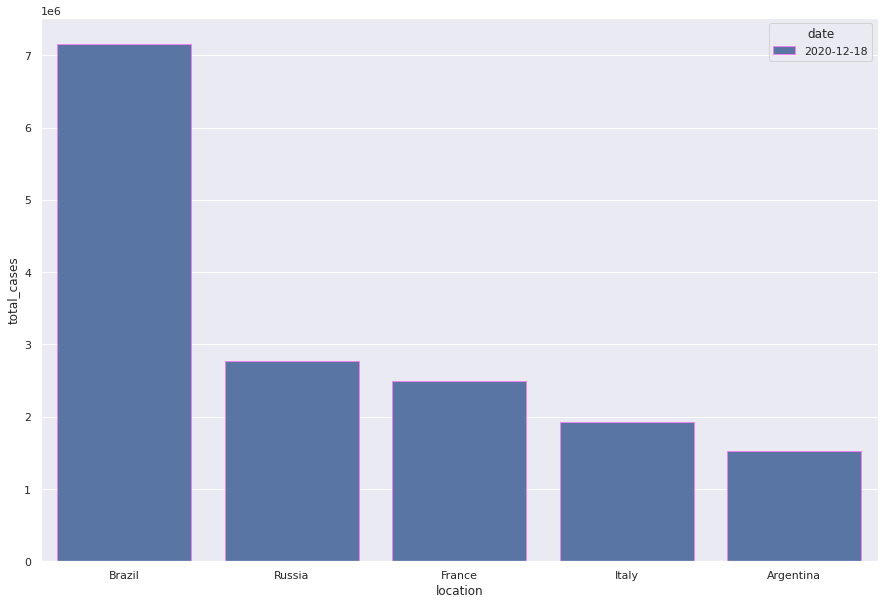

In [ ]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date",  edgecolor='violet')
plt.show()